<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_encoding as se


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')



In [2]:
import multiprocessing
multiprocessing.cpu_count()

4

In [3]:
df = pd.read_csv("datos/outliers_num.csv", index_col=0)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,kilometer_robust,powerCV_robust
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manually,golf,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57,0.0,-0.369107
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manually,NaN,5,diesel,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50,-1.0,1.123815
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,grand,8,diesel,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46,-1.0,0.744345
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manually,golf,6,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17,0.0,-0.525420
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manually,fabia,7,diesel,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21,-2.4,-0.612990


In [4]:
# primero vamos a sacar los nombres de las columnas que son de tipo categórico
lista_categ = df.select_dtypes(include = "O").columns.tolist()
lista_categ

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'lastSeen']

A estas categorías vamos a añadir también yearofRegistration y monthoRegistration, pues también las vamos a tratar como categorícas.

In [5]:
df[['monthOfRegistration', 'yearOfRegistration']] = df[['monthOfRegistration', 'yearOfRegistration']].astype(object)


In [6]:
mes_y_anio = ['monthOfRegistration', 'yearOfRegistration']
lista_col_categ = lista_categ + mes_y_anio


In [7]:
lista_col_categ

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'lastSeen',
 'monthOfRegistration',
 'yearOfRegistration']

Eliminamos las columnas name, model y DateCrawled que no nos aportan información de valor y son muy dificilmente graficables.

In [8]:
for col in ['name', 'model', 'dateCrawled','dateCreated', 'lastSeen']:
    if col in lista_col_categ:
        lista_col_categ.remove(col)

In [9]:
lista_col_categ

['seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'monthOfRegistration',
 'yearOfRegistration']

Para que la columna yearOfregistration nos aporte algo como variable categorica tenemos que tratarla. En primer lugar imputamos los nulos por la mediana

In [10]:
anio_mediana = df['yearOfRegistration'].median()
df['yearOfRegistration'].fillna(anio_mediana, inplace=True)

Ahora la dividimos en categorias atndiendo a la antigüedad del coche

In [11]:
df['yearOfRegistration'] = df['yearOfRegistration'].apply(
    lambda x: 'coches de museo' if x < 1940 else
              'coches clasicos' if 1940 <= x < 1980 else
              'coches antiguos' if 1980 <= x < 2000 else
              'coches actuales'
)

In [12]:
#Hay variables categoricas con nulos sin imputar. Esto hay que hacerlo en el primer notebook
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    df[column].fillna(mode_value, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 0 to 371527
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371528 non-null  object 
 1   name                 371528 non-null  object 
 2   seller               371528 non-null  object 
 3   offerType            371528 non-null  object 
 4   price                371528 non-null  float64
 5   abtest               371528 non-null  object 
 6   vehicleType          371528 non-null  object 
 7   yearOfRegistration   371528 non-null  object 
 8   gearbox              371528 non-null  object 
 9   model                371528 non-null  object 
 10  monthOfRegistration  371528 non-null  object 
 11  fuelType             371528 non-null  object 
 12  brand                371528 non-null  object 
 13  notRepairedDamage    371528 non-null  object 
 14  dateCreated          371528 non-null  object 
 15  lastSeen             3

Vamos a hacer un analisis visual de las columnas catgóricas. Prescinidmos del boxplot porque tenemos muchos ouliers y no vamos a poder identificar si una variable tiene orden o no. En su lugar, hacemos un barplot

In [14]:
df_sample=df.sample(1000)

In [15]:
# Instanciamos la clase de Encoding
analisis_encoding = se.Analisis_Visual_Encoding(variable_respuesta="price", dataframe=df, lista_variables_categorias=lista_col_categ)



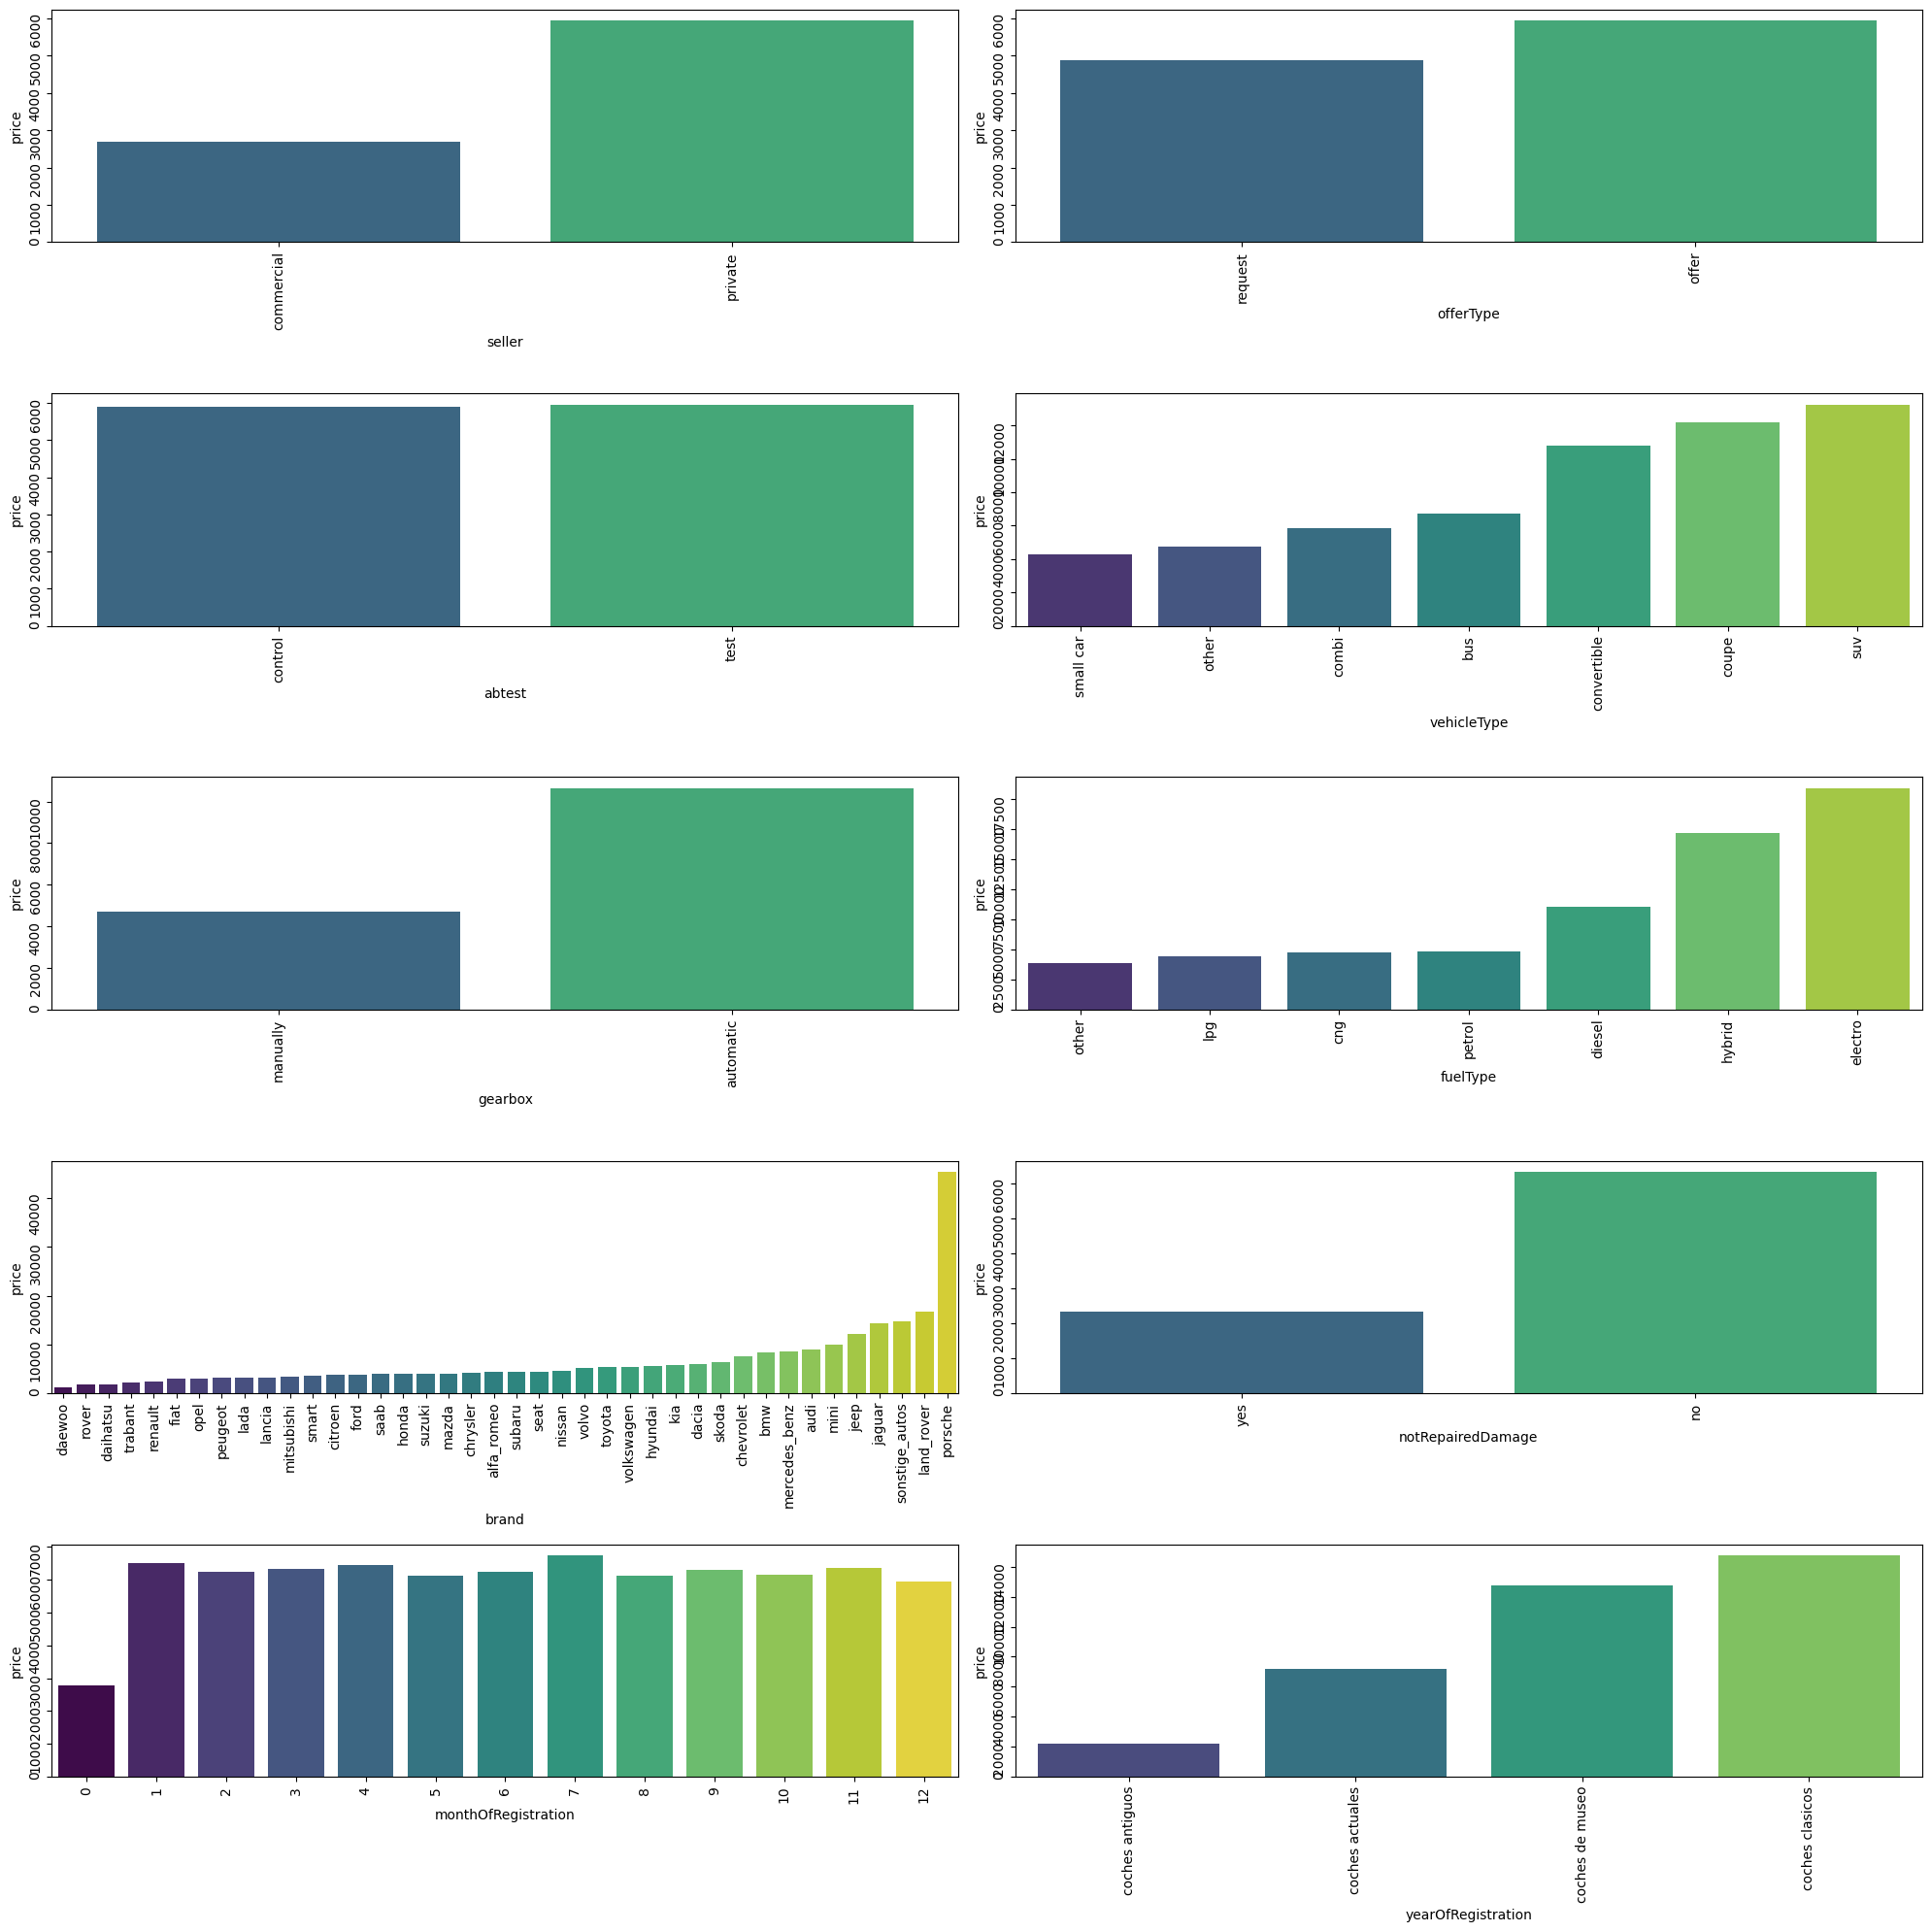

In [16]:
analisis_encoding.crear_barplot()

In [17]:
lista_col_categ

['seller',
 'offerType',
 'abtest',
 'vehicleType',
 'gearbox',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'monthOfRegistration',
 'yearOfRegistration']

Vamos a aplicar un test A/B. Lo primero es decidir cual es el más adecuado

In [18]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la asunción de normalidad
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable SELLER
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable seller las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['private', 'commercial']

Realizando test de Kruskal...
Estadístico de prueba: 1.1714137383855832
Valor p: 0.27911094567318656
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable OFFERTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable offerType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['offer', 'request']

Realizando test de Kruskal...
Estadístico de prueba: 0.6760049848231354
Valor p: 0.41096579707047964
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable ABTEST
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de Kruskal...
Estadístico de prueba: 0.02599265792721327
Valor p: 0.871918249834472
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['small car', 'coupe', 'suv', 'convertible', 'bus', 'combi', 'other']

Realizando test de Kruskal...
Estadístico de prueba: 40810.61698902744
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-874.4188,0.0,-1114.0633,-634.7743,bus-combi
1,4064.1037,0.0,3760.7301,4367.4774,bus-convertible
2,5469.5278,0.0,5149.0201,5790.0355,bus-coupe
3,-1951.2845,0.0,-2581.1616,-1321.4074,bus-other
4,-2428.0056,0.0,-2640.8329,-2215.1784,bus-small car
5,6544.1022,0.0,6195.9787,6892.2257,bus-suv
6,4938.5225,0.0,4673.7818,5203.2633,combi-convertible
7,6343.9466,0.0,6059.7332,6628.1600,combi-coupe
8,-1076.8657,0.0,-1689.0726,-464.6588,combi-other
9,-1553.5869,0.0,-1706.3858,-1400.7879,combi-small car



###########################

Estamos analizando la variable GEARBOX
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic']

Realizando test de Kruskal...
Estadístico de prueba: 33530.43113647325
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-5942.3047,0.0,-6035.8791,-5848.7302,automatic-manually



###########################

Estamos analizando la variable FUELTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'lpg', 'other', 'hybrid', 'cng', 'electro']

Realizando test de Kruskal...
Estadístico de prueba: 44590.90522932762
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3795.5618,0.0,2320.5212,5270.6024,cng-diesel
1,13680.5489,0.0,9932.6190,17428.4788,cng-electro
2,9929.7001,0.0,7358.7853,12500.6149,cng-hybrid
6,9884.9871,0.0,6436.1941,13333.7800,diesel-electro
7,6134.1382,0.0,4023.0254,8245.2511,diesel-hybrid
8,-4092.2276,0.0,-4583.4077,-3601.0476,diesel-lpg
9,-4653.1369,0.0,-7092.9773,-2213.2965,diesel-other
10,-3689.5934,0.0,-3817.1615,-3562.0254,diesel-petrol
12,-13977.2147,0.0,-17457.5152,-10496.9142,electro-lpg
13,-14538.1239,0.0,-18759.9784,-10316.2695,electro-other



###########################

Estamos analizando la variable BRAND
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover', 'land_rover', 'lada']

Realizando test de Kruskal...
Estadístico de prueba: 56572.67441665424
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,4657.3391,0.0000,3712.4023,5602.2758,alfa_romeo-audi
1,4149.7626,0.0000,3210.6248,5088.9003,alfa_romeo-bmw
2,3310.4630,0.0000,1934.6834,4686.2427,alfa_romeo-chevrolet
6,-3182.6237,0.0000,-5289.6202,-1075.6273,alfa_romeo-daewoo
7,-2480.4368,0.0001,-4285.5180,-675.3556,alfa_romeo-daihatsu
...,...,...,...,...,...
770,1283.8396,0.0054,163.1667,2404.5125,suzuki-toyota
772,1290.0083,0.0001,360.4502,2219.5663,suzuki-volkswagen
774,-3059.8715,0.0000,-4989.4777,-1130.2652,toyota-trabant
777,3066.0401,0.0000,1240.7865,4891.2937,trabant-volkswagen



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['no', 'yes']

Realizando test de Kruskal...
Estadístico de prueba: 22159.69477024923
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-4010.6403,0.0,-4140.4701,-3880.8105,no-yes



###########################

Estamos analizando la variable MONTHOFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: [0, 5, 8, 6, 7, 10, 12, 11, 2, 3, 1, 4, 9]

Realizando test de Kruskal...
Estadístico de prueba: 17857.09209400237
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None